## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





## 1. Data Preparation

**Load the library and dataset**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

train = pd.read_csv('train.csv')
train.shape

(1460, 81)

In [13]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
train.describe().round(0)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1201.0,1460.0,1460.0,1460.0,1460.0,1460.0,1452.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.0,57.0,70.0,10517.0,6.0,6.0,1971.0,1985.0,104.0,444.0,...,94.0,47.0,22.0,3.0,15.0,3.0,43.0,6.0,2008.0,180921.0
std,422.0,42.0,24.0,9981.0,1.0,1.0,30.0,21.0,181.0,456.0,...,125.0,66.0,61.0,29.0,56.0,40.0,496.0,3.0,1.0,79443.0
min,1.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,366.0,20.0,59.0,7554.0,5.0,5.0,1954.0,1967.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.0,50.0,69.0,9478.0,6.0,5.0,1973.0,1994.0,0.0,384.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.0,70.0,80.0,11602.0,7.0,6.0,2000.0,2004.0,166.0,712.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


The dataset named 'Train.csv' consists of 81 variables and 1,460 indices in each column.

**Missing Values Calculation**

In [24]:
missing_values = train.isnull().sum()

missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [106]:
missing_values[missing_values > 0].shape

(19,)

There are 19 out of 81 variables that include missing values. We do not use these variables for the analysis

## 2. Analyzing Numerical Variables

#### Draw a Histogram and boxplot for SalePrice
We are interested in 'SalePrice' as the dependent variable

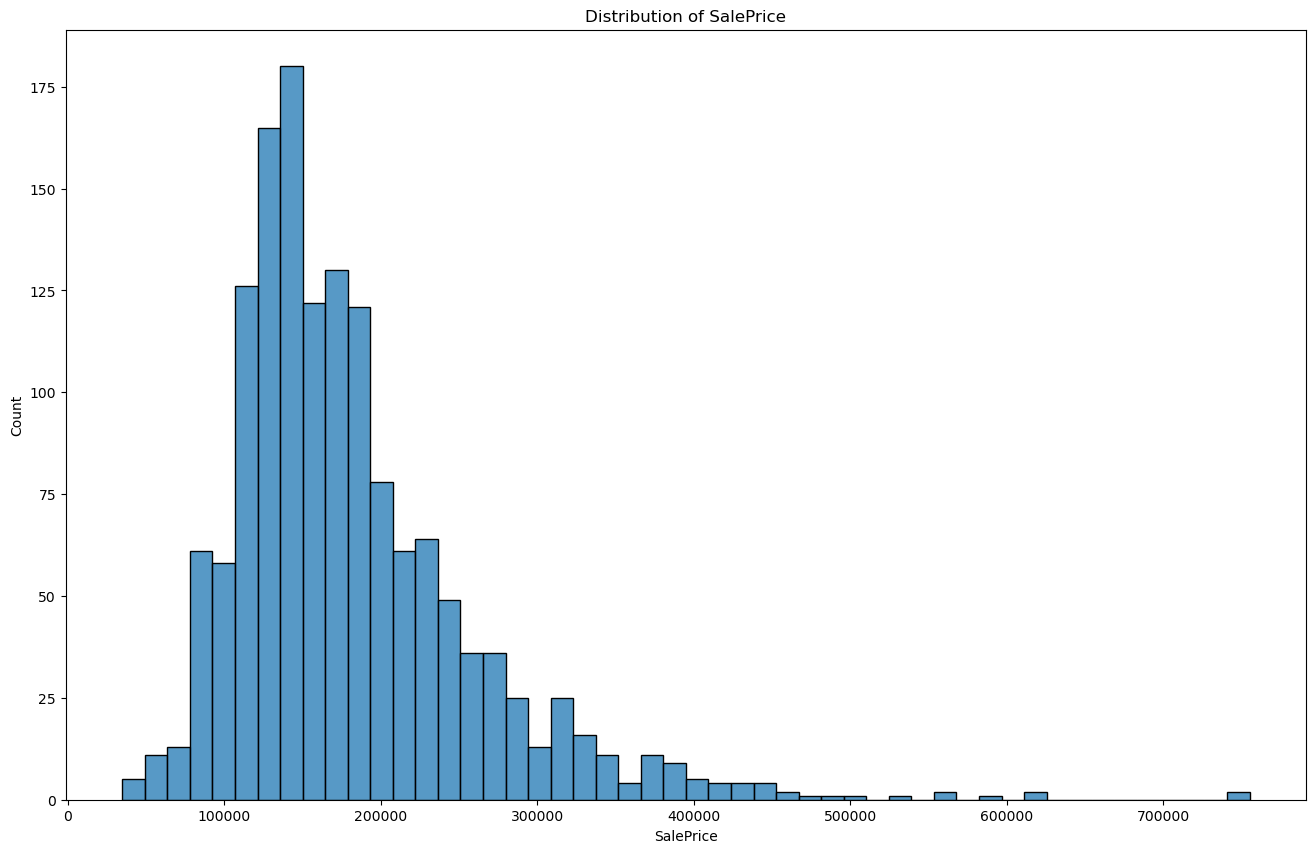

In [66]:
plt.figure(figsize=(16, 10))
sns.histplot(x=train['SalePrice'], bins=50)

plt.title('Distribution of SalePrice')
plt.show()

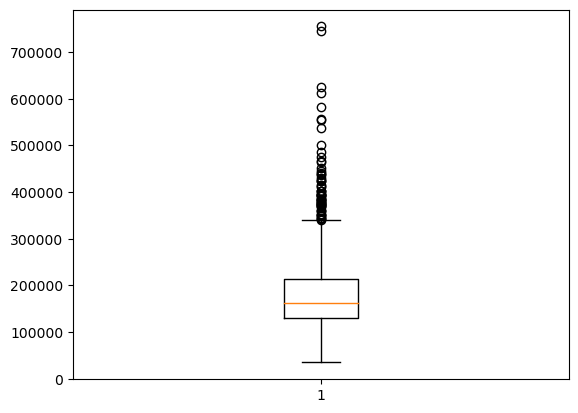

In [67]:
plt.boxplot(train['SalePrice'])
 
# show plot
plt.show()

Based on the histogram and boxplot, we can observe that the distribution of 'SalePrice' is **right-skewed** and contains outliers, which have an impact on both the variation and the mean.

**Correlation matrix**

C:\Users\byamb\AppData\Local\Temp\ipykernel_13960\3607936339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(train.corr(), fignum=f.number)


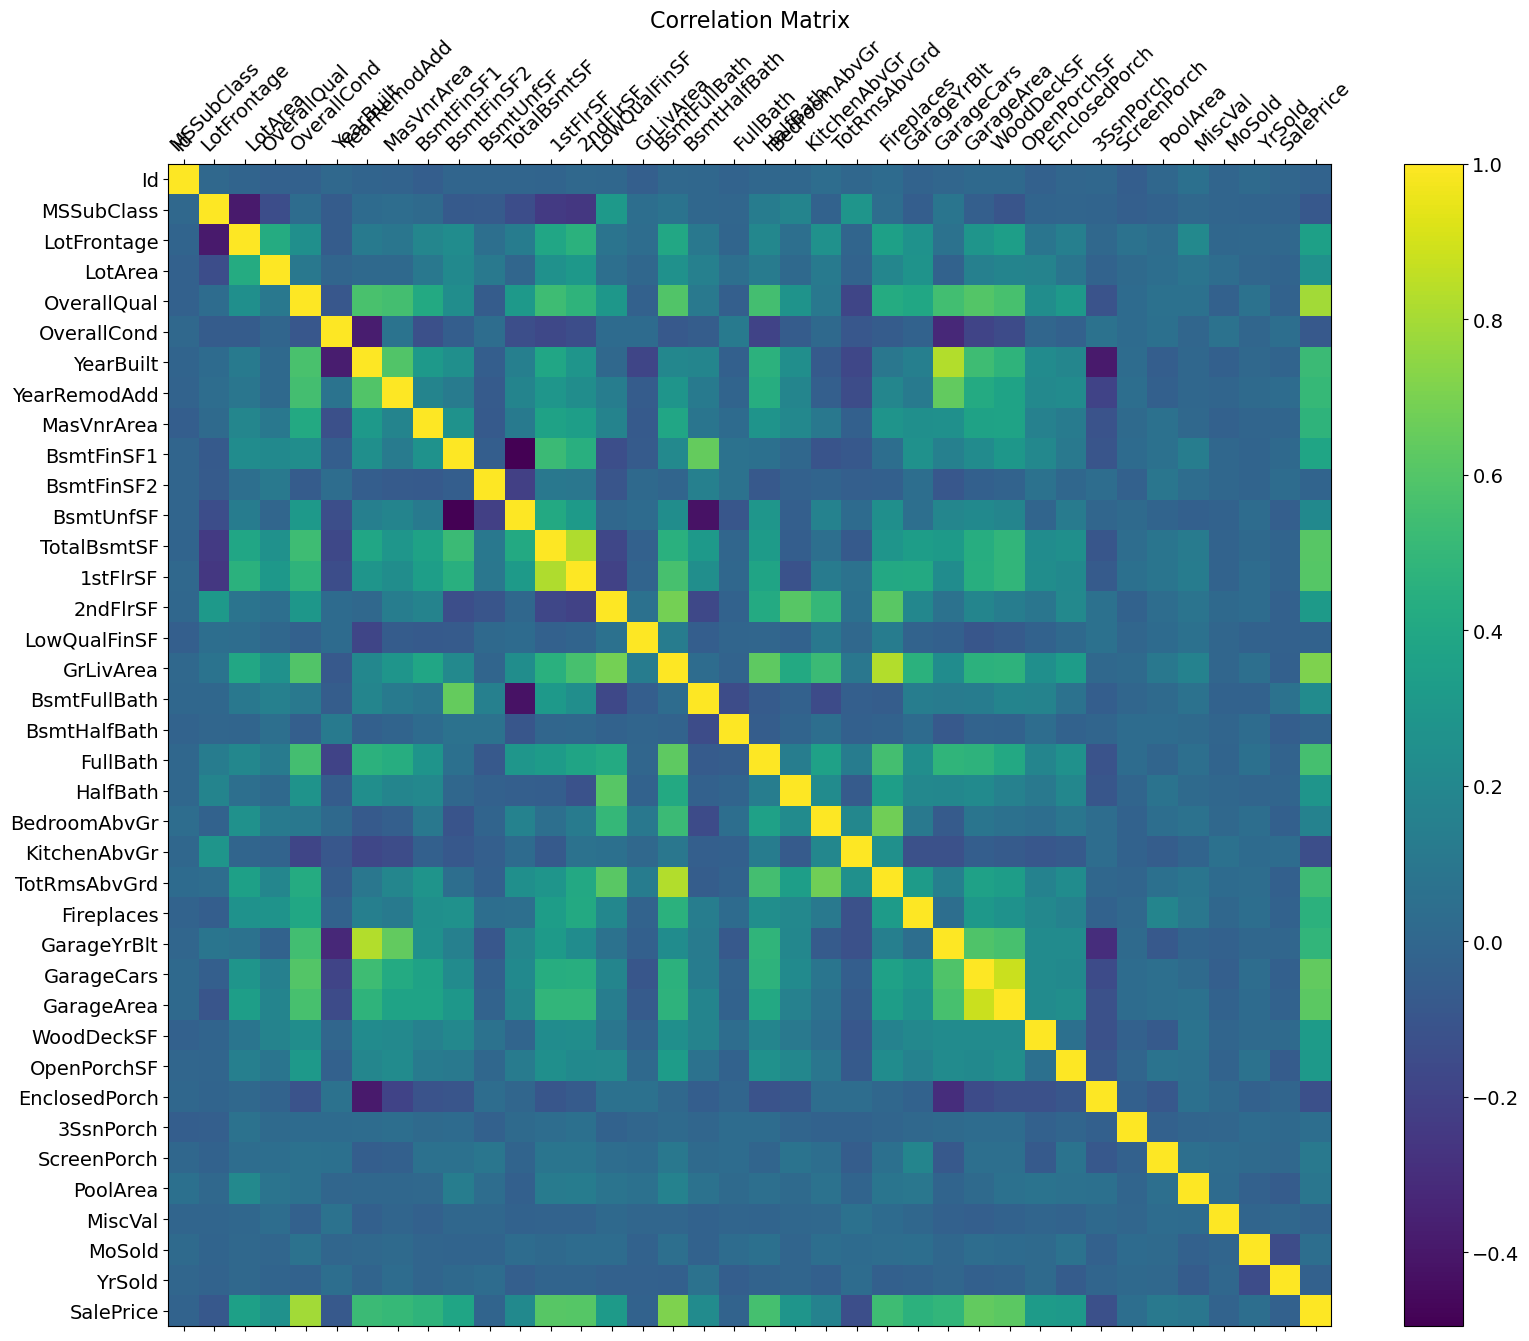

In [48]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

**Sort all correlation coefficients related to SalePrice**

In [52]:
corr_matrix=train.corr()
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

C:\Users\byamb\AppData\Local\Temp\ipykernel_13960\1701280885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=train.corr()


For the 'SalePrice' as a dependent variable we can see that there are strong positive correlations, such as with 'OverallQual'(Material and finish quality) and 'GrLivArea' (Ground living area), indicate factors that positively impact. Conversely, 'KitchenAbvGr'(Number of kitchens) and 'EnclosedPorch'(Area), suggest factors that negatively influence sale prices. 

**Draw pairplot for comparing relationship between variables**

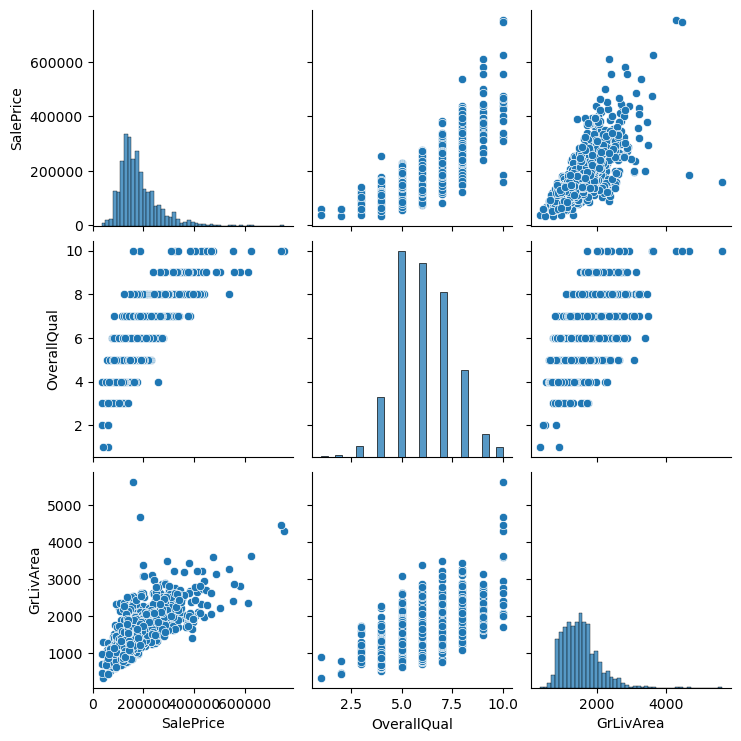

In [82]:
sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea']])
plt.show()

#### Conclusion for Numerical Analysis:

Both the overall quality of a property ('OverallQual') and the size of the living area ('GrLivArea') are positively associated with higher sale prices ('SalePrice')

Outliers in 'GrLivArea' vs. 'SalePrice' might be worth investigating further.

'SalePrice' is positively skewed, with a tail extending towards higher prices. This suggests that more properties have sale prices on the lower end, while relatively fewer have very high sale prices.

The scatterplots show that 'SalePrice' relationships with 'OverallQual' and 'GrLivArea' could potentially be modeled with linear regression. This suggests that these variables might be good candidates for predicting sale prices.

## 3. Analyzing Categorical Variables

In [114]:
categorical = train[['CentralAir', 'SaleCondition','Heating']]

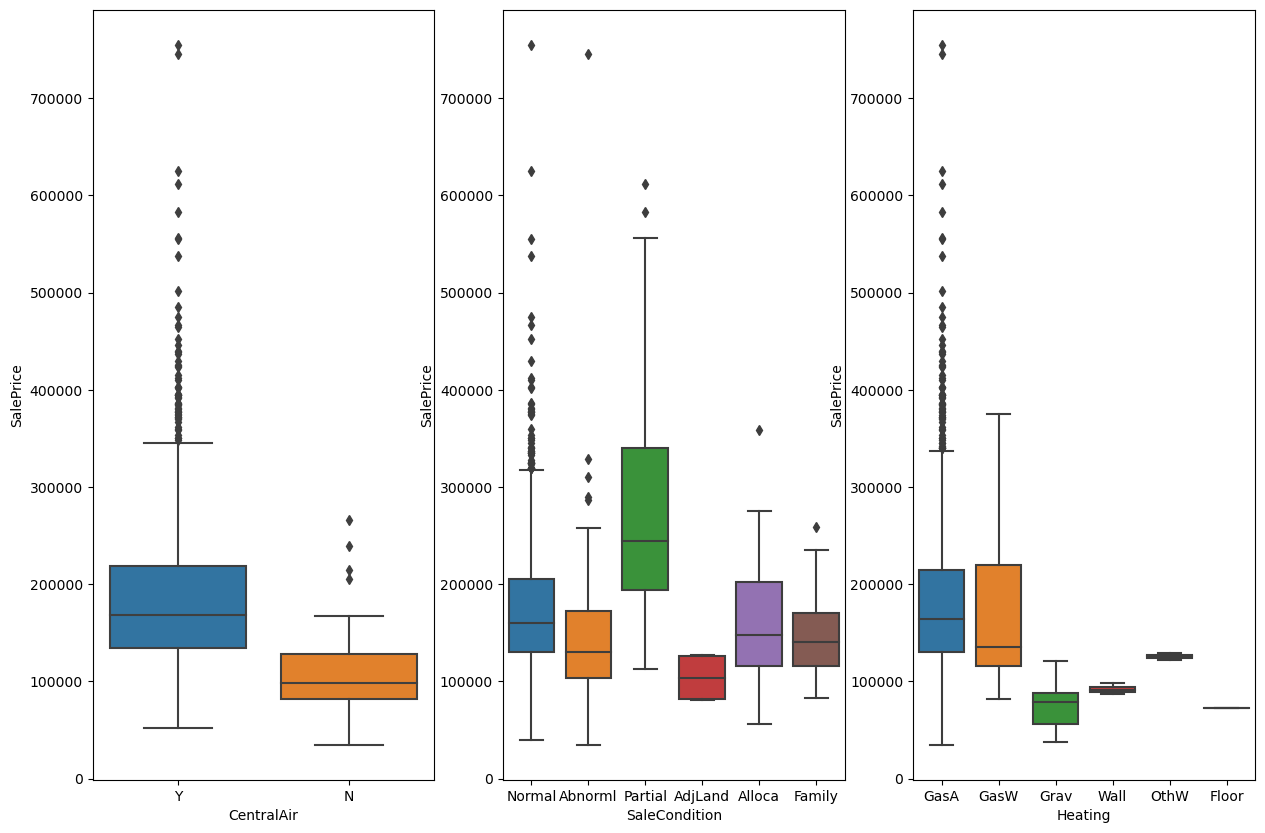

In [116]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=train, ax=subplot)

#### Conclusion for Categorical Analysis
The highest sale prices are typically associated with properties that have central air conditioning (CentralAir: Yes) or are in a 'Partial' sale condition.
We can observe a few outliers in each category, except for the 'SaleCondition' category, which is 'AdLand'.